## Import packages

In [6]:
install.packages("arules")
library(arules)

Installing package into ‘/home/martinho/R/x86_64-pc-linux-gnu-library/3.3’
(as ‘lib’ is unspecified)


In [25]:
install.packages("ggplot2")

Installing package into ‘/home/martinho/R/x86_64-pc-linux-gnu-library/3.3’
(as ‘lib’ is unspecified)


In [7]:
install.packages("clv")

Installing package into ‘/home/martinho/R/x86_64-pc-linux-gnu-library/3.3’
(as ‘lib’ is unspecified)


In [8]:
install.packages("klaR")

Installing package into ‘/home/martinho/R/x86_64-pc-linux-gnu-library/3.3’
(as ‘lib’ is unspecified)


In [9]:
install.packages("caret")

Installing package into ‘/home/martinho/R/x86_64-pc-linux-gnu-library/3.3’
(as ‘lib’ is unspecified)


In [12]:
install.packages("dplyr")

Installing package into ‘/home/martinho/R/x86_64-pc-linux-gnu-library/3.3’
(as ‘lib’ is unspecified)


In [11]:
discretize_all = function(table_d, type, n){
    for (i in 1:ncol(table_d)) {
        if (is.numeric(table_d[[i]])) {
            table_d[[i]]  =  discretize(table_d[[i]],  method  =  type,  categories  =  n, ordered=TRUE)
        }
    }
    print(summary(table_d))
    return(table_d);
}

#### Change directory

In [13]:
setwd("~/Documents/IST/SAD/lab3")

## 1. - example.csv e adult.csv
### a.

In [22]:
library(readr)
iris = read_csv("data/iris.csv")
class(iris)

Parsed with column specification:
cols(
  sepallength = col_double(),
  sepalwidth = col_double(),
  petallength = col_double(),
  petalwidth = col_double(),
  class = col_character()
)


[1] "tbl_df"     "tbl"        "data.frame"

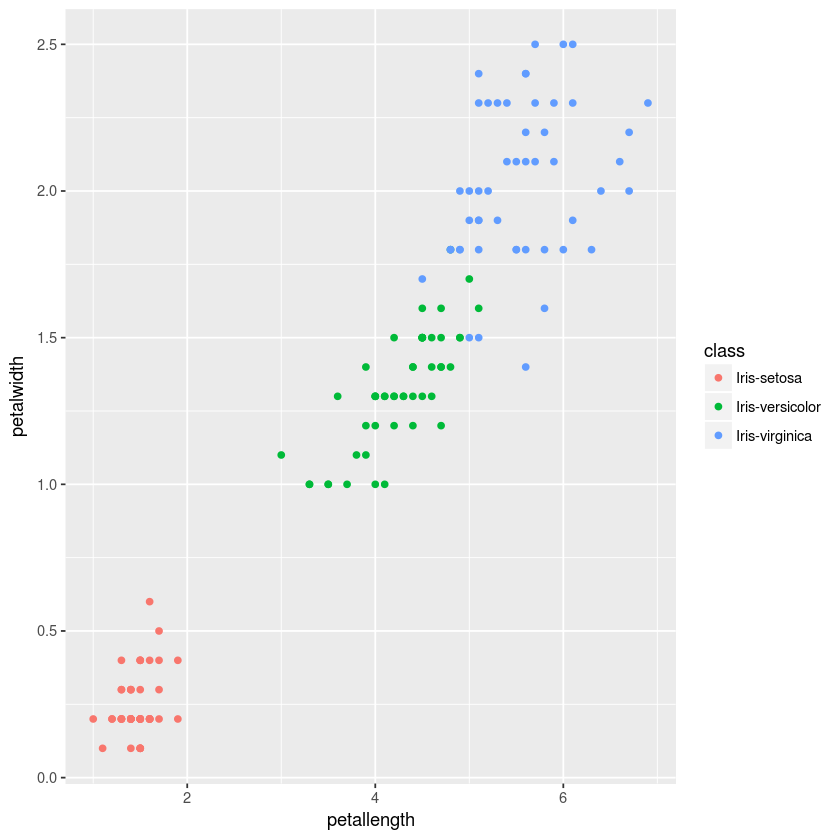

In [28]:
library(ggplot2)
ggplot(iris, aes(petallength, petalwidth, idth, color = class)) + geom_point()

In [ ]:
irisCluster <- kmeans(iris[, 3:4], 3, nstart = 20)

In [ ]:
irisCluster$cluster <-as.factor(irisCluster$cluster)

In [ ]:
inspect(example)

In [ ]:
is <- apriori(example, parameter = list(support= 0.2, target="frequent"))
inspect(is)

### b.

In [ ]:
adult = read.transactions("data/adult.csv",format="basket", sep=",")

In [ ]:
adult_rules <- apriori(adult, parameter = list(supp = 0.5, conf = 0.9, target = "rules")) 

In [ ]:
inspect(adult_rules)

## 2. - vote.csv
### a.

In [ ]:
library(readr)
vote <-read_csv("data/vote.csv")

#### Este comando dá erro e é previsto dar erro, pelo menos é o que a stora diz no doc de apoio. Mas não percebo bem porque é que isso acontece

In [ ]:
rules_vote <-apriori(vote, parameter = list(supp = 0.1, conf = 1, target = "rules")

In [ ]:
library(dplyr)
vote = mutate_if(vote, is.character, as.factor)
head(vote,n=5)

In [ ]:
vote_rules_sup_0_1 <-apriori(vote, parameter = list(supp = 0.1, conf = 0.8,maxlen=100)) 
vote_rules_sup_0_2 <-apriori(vote, parameter = list(supp = 0.2, conf = 0.8,maxlen=100)) 
vote_rules_sup_0_5 <-apriori(vote, parameter = list(supp = 0.5, conf = 0.8,maxlen=100)) 
vote_rules_conf_0_1 <-apriori(vote, parameter = list(supp = 0.1, conf = 0.1,maxlen=100)) 
vote_rules_conf_0_2 <-apriori(vote, parameter = list(supp = 0.2, conf = 0.2,maxlen=100)) 
vote_rules_conf_0_5 <-apriori(vote, parameter = list(supp = 0.5, conf = 0.5,maxlen=100))  

### b.

In [ ]:
inspect(head(sort(vote_rules_sup_0_1,by="lift",decreasing = FALSE),n=3))

In [ ]:
inspect(head(sort(vote_rules_sup_0_2,by="lift",decreasing = FALSE),n=3))

In [ ]:
inspect(head(sort(vote_rules_sup_0_5,by="lift",decreasing = FALSE),n=3))

In [ ]:
inspect(head(sort(vote_rules_conf_0_1,by="lift",decreasing = FALSE),n=3))

In [ ]:
inspect(head(sort(vote_rules_conf_0_2,by="lift",decreasing = FALSE),n=3))

In [ ]:
inspect(head(sort(vote_rules_conf_0_5,by="lift",decreasing = FALSE),n=3))

### c.

Case não funciona porque convictio = NaN

In [ ]:
case1 = cbind(as(vote_rules_sup_0_1, "data.frame"), conviction=interestMeasure(vote_rules_sup_0_1, "conviction", vote))
case1 = case1[complete.cases(case1), ]
dim(case1)
head(case1,n=3)
n1 = which(case1$conviction >= 1)
length(n1)

In [ ]:
case2 = cbind(as(vote_rules_sup_0_2, "data.frame"), conviction=interestMeasure(vote_rules_sup_0_2, "conviction", vote))
case2 = case2[complete.cases(case2), ]
dim(case2)
head(case2,n=3)
n2 = which(case2$conviction >= 1)
length(n2)

In [ ]:
case3 = cbind(as(vote_rules_sup_0_5, "data.frame"), conviction=interestMeasure(vote_rules_sup_0_5, "conviction", vote))
case3 = case1[complete.cases(case3), ]
dim(case3)
head(case3,n=3)
n3 = which(case3$conviction >= 1)
length(n3)

In [ ]:
case4 = cbind(as(vote_rules_conf_0_1, "data.frame"), conviction=interestMeasure(vote_rules_conf_0_1, "conviction", vote))
case4 = case4[complete.cases(case4), ]
dim(case4)
head(case4,n=3)
n4 = which(case4$conviction >= 1)
length(n4)

In [ ]:
case5 = cbind(as(vote_rules_conf_0_2, "data.frame"), conviction=interestMeasure(vote_rules_conf_0_2, "conviction", vote))
case5 = case5[complete.cases(case5), ]
dim(case5)
head(case5,n=3)
n5 = which(case5$conviction >= 1)
length(n5)

In [ ]:
case6 = cbind(as(vote_rules_conf_0_5, "data.frame"), conviction=interestMeasure(vote_rules_conf_0_5, "conviction", vote))
case6 = case6[complete.cases(case6), ]
dim(case6)
head(case6,n=3)
n6 = which(case6$conviction >= 1)
length(n6)

### d.

Não sei bem o que responder aqui!

## 3. - supermarket.csv
### a.

In [ ]:
supermarket <-read_csv("data/supermarket.csv")
head(supermarket,n=5)

#### Aqui tambem é previsto dar erro, mas também não percebo bem porquê :o


In [ ]:
supermaket_rules <-apriori(supermarket, parameter = list(supp =0.9, conf = 1, maxlen=100, target = "rules")) 

In [ ]:
supermarket = mutate_if(supermarket, is.character, as.factor)

In [ ]:
supermaket_rules <-apriori(supermarket, parameter = list(supp = 0.9, conf = 1, maxlen=10, target = "rules")) 

In [ ]:
write(supermaket_rules[1:10],"",sep="\n ", quote=TRUE)

### b.

### c.

## 4. - glass.csv
### a.

In [ ]:
glass <-read_csv("data/glass.csv")
head(glass,n=5)

In [ ]:
glass_d_int = discretize_all(glass, "interval",3)
class(glass_d_int)

In [ ]:
head(glass_d_int,n=5)

In [ ]:
glass_d_fr = discretize_all(glass, "frequency",3)

In [ ]:
head(glass_d_fr,n=5)

In [ ]:
rules <-apriori(supermarket, parameter = list(supp = 0.9, conf = 1, maxlen=10, target = "rules")) 